<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

# Metric

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Loading data (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# Здесь я делал все по заданию, но была проблема что одна из колонок не конвертировалась в численный формат. 
# Я руками посмотрел через try-except перебрал и увидел что не конвертируются только строчки ' '.

data = data.replace(' ', np.nan)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data['TotalSpent'] = data['TotalSpent'].fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## EDA (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
def find_invalid_floats(arr: list) -> list:
    """
    Searches for strings in a list which cannot be converted to float.
    :param arr: a list of strings
    :returns: a list of strings which cannot be converted to float.
    """

    invalid = []
    for string in arr:
        try:
          float(string)
        except:
          invalid.append(string)
    return invalid


#find_invalid_floats(data['TotalSpent')])
data['TotalSpent'] = data['TotalSpent'].astype('float')

Ellipsis

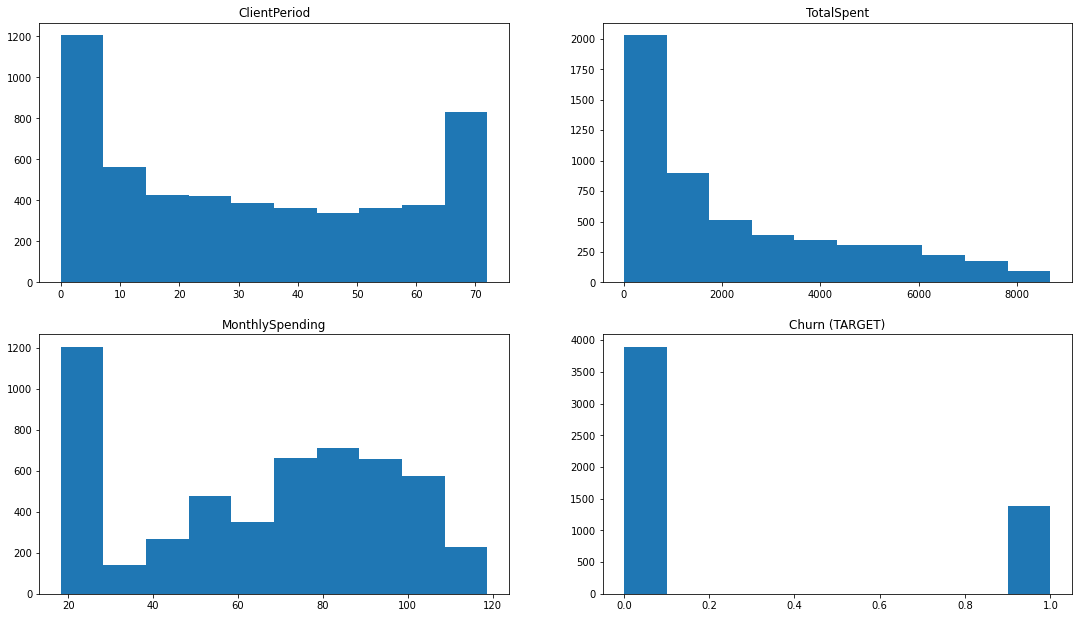

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

for i, col in enumerate(num_cols):
    labels = data[col].values
    axs[i % 2, i // 2].hist(data[col])
    axs[i % 2, i // 2].title.set_text(col)

axs[1, 1].hist(data[target_col])
axs[1, 1].title.set_text(target_col + " (TARGET)")
...

Анализ вышепостроенной картинки:

Таргет действительно слегка несбалансирован. Можно наблюдать что 0 появляется приблизительно в три раза больше чем 1. Поскольку несбалансированность не сильная, то будем пробовать обучать без балансировки. 

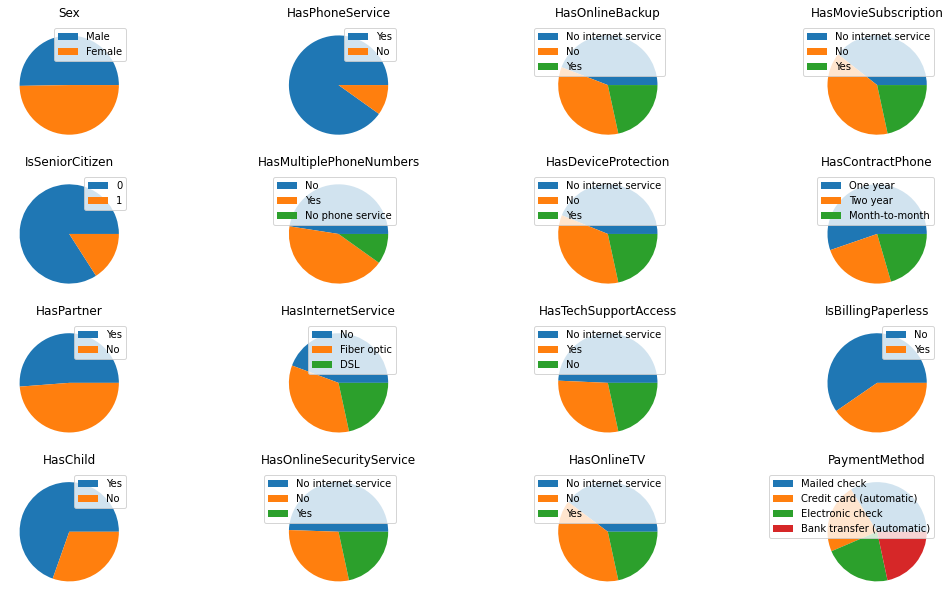

In [ ]:
fig, axs = plt.subplots(4, 4)
fig.set_size_inches(18.5, 10.5)

for i, col in enumerate(cat_cols):
    labels = data[col].unique()
    patches, texts = axs[i % 4, i // 4].pie(data[col].value_counts())
    axs[i % 4, i // 4].legend(patches, labels, loc="best")
    axs[i % 4, i // 4].title.set_text(col)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Using linear model (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('one_hot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_cols),
                                            ('cat', cat_transformer, cat_cols)])

pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                       ('classiffier', LogisticRegression(max_iter=10000))])

params = {
    'classiffier__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

CV_model = GridSearchCV(estimator=pipe, param_grid=params, 
                        scoring='roc_auc', cv=5, refit=True)


CV_model.fit(data[feature_cols], data[target_col])

print(f'Best score: {CV_model.best_score_}')
print(f'Best params: {CV_model.best_params_}')


Best score: 0.8451139778721192
Best params: {'classiffier__C': 10}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить



Best score: 0.8451139778721192

Best params: C = 10

## Using gradient boosting (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost
import catboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], 
                                                    data[target_col], 
                                                    train_size=0.8)

In [ ]:
def test_features(n_trees=1000, lr=0.03):
    boosting_model = catboost.CatBoostClassifier(n_estimators=n_trees, 
                                                 learning_rate=lr,
                                                 cat_features=cat_cols)

    boosting_model.fit(X_train, y_train)

    y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
    y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)
    print(train_auc, test_auc)

In [ ]:
test_features(974, 0.02)

0:	learn: 0.6797526	total: 74.1ms	remaining: 1m 12s
1:	learn: 0.6674551	total: 101ms	remaining: 49.1s
2:	learn: 0.6557284	total: 113ms	remaining: 36.4s
3:	learn: 0.6445051	total: 124ms	remaining: 30.1s
4:	learn: 0.6332285	total: 136ms	remaining: 26.4s
5:	learn: 0.6226073	total: 156ms	remaining: 25.2s
6:	learn: 0.6123257	total: 188ms	remaining: 26s
7:	learn: 0.6027118	total: 207ms	remaining: 25s
8:	learn: 0.5930173	total: 219ms	remaining: 23.5s
9:	learn: 0.5843391	total: 233ms	remaining: 22.4s
10:	learn: 0.5757035	total: 245ms	remaining: 21.5s
11:	learn: 0.5688181	total: 252ms	remaining: 20.2s
12:	learn: 0.5608130	total: 273ms	remaining: 20.2s
13:	learn: 0.5534456	total: 307ms	remaining: 21.1s
14:	learn: 0.5468493	total: 335ms	remaining: 21.4s
15:	learn: 0.5406298	total: 395ms	remaining: 23.7s
16:	learn: 0.5348860	total: 407ms	remaining: 22.9s
17:	learn: 0.5292522	total: 429ms	remaining: 22.8s
18:	learn: 0.5239735	total: 452ms	remaining: 22.7s
19:	learn: 0.5188988	total: 493ms	remaining

In [ ]:
best_n_trees, best_lr = 974, 0.2

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Best parameters: (974, 0.2), giving accuracy of 0.85528. Manual search

# Предсказания

In [ ]:
best_model = catboost.CatBoostClassifier(n_estimators=best_n_trees, 
                                                 learning_rate=best_lr,
                                                 cat_features=cat_cols)
best_model.fit(X_train, y_train)

0:	learn: 0.5810340	total: 12.3ms	remaining: 11.9s
1:	learn: 0.5155552	total: 24ms	remaining: 11.7s
2:	learn: 0.4779494	total: 34.4ms	remaining: 11.1s
3:	learn: 0.4495891	total: 45.3ms	remaining: 11s
4:	learn: 0.4316556	total: 56.7ms	remaining: 11s
5:	learn: 0.4204881	total: 81.7ms	remaining: 13.2s
6:	learn: 0.4130632	total: 93.5ms	remaining: 12.9s
7:	learn: 0.4073431	total: 103ms	remaining: 12.4s
8:	learn: 0.4053711	total: 111ms	remaining: 11.8s
9:	learn: 0.4022195	total: 119ms	remaining: 11.5s
10:	learn: 0.3984295	total: 128ms	remaining: 11.2s
11:	learn: 0.3971793	total: 139ms	remaining: 11.2s
12:	learn: 0.3958739	total: 149ms	remaining: 11s
13:	learn: 0.3937361	total: 157ms	remaining: 10.8s
14:	learn: 0.3935740	total: 161ms	remaining: 10.3s
15:	learn: 0.3904059	total: 170ms	remaining: 10.2s
16:	learn: 0.3902538	total: 176ms	remaining: 9.88s
17:	learn: 0.3899859	total: 185ms	remaining: 9.83s
18:	learn: 0.3886464	total: 197ms	remaining: 9.9s
19:	learn: 0.3861788	total: 215ms	remaining

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv',  index=False)

# Conclusion & Results

First cleared the data by removing Nan and  ' '.

Then I studied the dataset with the help of histograms and pie charts, which showed that the target is slightly unbalanced, but not too significantly.

At the end, I trained two proposed models: LogisticRegression and CatBoostClassifier. In the first, I tuned the parameters with a gridsearch, in the second manually.

Best catboost results on test: 0.855, with ntrees=974 and learning rate 0.2